<a href="https://colab.research.google.com/github/ddinesan/Manga/blob/master/Lecture_2_and_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Lectures 2 & 3: Basics of Quantum Computing**

This is a worksheet prepared by Nadine Stritzelberger for Lectures 2 and 3 of the reading course "Introduction to Quantum Computer Programming" (AMATH 900/ AMATH 495/ QIC 895) at the University of Waterloo.

Course Webpage: https://sites.google.com/view/quantum-computer-programming

Text followed in the course: [Quantum Computing, An Applied Approach](https://www.springer.com/gp/book/9783030239213) by Jack D. Hidary (2019)

In this notebook we will use Cirq to demonstrate some of the basics of Quantum Computing (e.g. qubits, superpositions, entanglement, gates, measurements, Bloch sphere representation, etc.).
This notebook is in large parts based on [this notebook](https://colab.research.google.com/drive/1mrDPc0HSBxgD_-wwif_gUGriM3VTNYoy#scrollTo=rPqVUsD9snYf&forceEdit=true&sandboxMode=true) by Stefan Leichenauer and others and the [Cirq documentation](https://readthedocs.org/projects/cirq/downloads/pdf/latest/).


## Installing and importing Cirq

First of all, we need to install the Python library Cirq:

In [ ]:
!pip install cirq

Now let's import Cirq: 

In [ ]:
import cirq
import numpy as np
import matplotlib

# Here Evan defined a utility function to print circuits nicely (see Lecture 1)
from cirq.contrib.svg import circuit_to_svg
from IPython.display import SVG, display
import os

def cprint(circuit):
  """Convert the cirq.Circuit to a temp svg and display + garbage collect."""
  with open("temp.svg", 'w+') as f:
    f.write(circuit_to_svg(circuit))
  display(SVG('temp.svg'))
  os.remove('temp.svg')

We can now assume that Cirq has been imported throughout the rest of this notebook.

## Circuits, Moments and Operations

* In Cirq, a circuit is represented by a `Circuit` object
* A `Circuit` is a collection of `Moment` objects
* A `Moment` is a collection of `Operation`s that all act during the same time slice (i.e. `Operation`s appearing on the same vertical line constitute a Moment)
* An `Operation` is a an effect that operates on a specific subset of Qubits. 

![Circuits, Moments, and Operations.](https://cirq.readthedocs.io/en/latest/_images/CircuitMomentOperation.png)


## Qubits 

The first thing we do when building a circuit is pick some qubits to use. 

Qubits (and other quantum objects) are identified by instances of subclasses of the `cirq.Qid` base class (Quantum id base class). 
These subclasses simply identify what you wish to operate on. Different subclasses of the `Qid` class can be used for different purposes. 

E.g. the subclass `cirq.NamedQubit` allows us to define some abstract qubits simply identified by a name such as "a":

In [ ]:
a = cirq.NamedQubit("a")
b = cirq.NamedQubit("b")
c = cirq.NamedQubit("c")
qubits=[a, b, c]
print(qubits)

[cirq.NamedQubit('a'), cirq.NamedQubit('b'), cirq.NamedQubit('c')]


The subclass `cirq.LineQubit` allows us to define a line of qubits of specified length:

In [ ]:
line = cirq.LineQubit.range(5)
print(line)

[cirq.LineQubit(0), cirq.LineQubit(1), cirq.LineQubit(2), cirq.LineQubit(3), cirq.LineQubit(4)]


The qubits that Google's Xmon devices use are often arranged on the vertices of a square grid. We use the subclass `cirq.GridQubit` to create e.g. a $2\times 2$ grid of qubits:

In [ ]:
# Define the length of the grid
length = 2
# Define the qubits on the grid
qubits = [cirq.GridQubit(x, y) for x in range(length) for y in range(length)]
# Print the first qubit
print(qubits[0])
# Print all qubits
print(qubits)

(0, 0)
[cirq.GridQubit(0, 0), cirq.GridQubit(0, 1), cirq.GridQubit(1, 0), cirq.GridQubit(1, 1)]


We might want to create a circuit for the Bristlecone device (72 qubits) by Google:

![Google's Bristecone chip](https://4.bp.blogspot.com/-b9akad6ismU/WpmyaJo-cYI/AAAAAAAACa8/mCqPBJxv5oUivy6Jq42FSOQYkeRlTmkiwCLcBGAs/s1600/image1.png)

To see what the qubit architecture of the Bristlecone chip looks like, we can print out a diagram (a grid of qubits) of the device: 

In [ ]:
print(cirq.google.Bristlecone)

                                             (0, 5)────(0, 6)
                                             │         │
                                             │         │
                                    (1, 4)───(1, 5)────(1, 6)────(1, 7)
                                    │        │         │         │
                                    │        │         │         │
                           (2, 3)───(2, 4)───(2, 5)────(2, 6)────(2, 7)───(2, 8)
                           │        │        │         │         │        │
                           │        │        │         │         │        │
                  (3, 2)───(3, 3)───(3, 4)───(3, 5)────(3, 6)────(3, 7)───(3, 8)───(3, 9)
                  │        │        │        │         │         │        │        │
                  │        │        │        │         │         │        │        │
         (4, 1)───(4, 2)───(4, 3)───(4, 4)───(4, 5)────(4, 6)────(4, 7)───(4, 8)───(4, 9)───(4, 10)
         │        │      

We again use the subclass `cirq.GridQubit` and write e.g. `cirq.GridQubit(5, 0)` to refer to the qubit in the left most position of the device:

In [ ]:
print(cirq.GridQubit(5,0))

(5, 0)


Here is a diagram of another Google chip (Foxtail) with 22 Xmon qubits:

In [ ]:
print(cirq.google.Foxtail)

(0, 0)───(0, 1)───(0, 2)───(0, 3)───(0, 4)───(0, 5)───(0, 6)───(0, 7)───(0, 8)───(0, 9)───(0, 10)
│        │        │        │        │        │        │        │        │        │        │
│        │        │        │        │        │        │        │        │        │        │
(1, 0)───(1, 1)───(1, 2)───(1, 3)───(1, 4)───(1, 5)───(1, 6)───(1, 7)───(1, 8)───(1, 9)───(1, 10)


To create a qudit named ‘q’ (e.g. a qutrit with dimension 3), we specify the dimension as follows:

In [ ]:
q = cirq.NamedQubit('q').with_dimension(3)
print(q)

q (d=3)


##Operations and Gates

Next we need some operations to apply to our qubits. 

In Cirq, we distinguish between `Operation`s and `Gate`s :

*   An `Operation` is associated with specific qubits and can be put in a `Circuit`.
*   A `Gate` object has unspecified qubits. When applied to qubits, a `Gate` object will produce an `Operation`, more specifically a `GateOperation` (which is the most common type of `Operation`). `Gate` objects are instantiations of the `Gate` class.

*Example:* 
* `cirq.H` is a gate object (which is an instance of the `HGate` class, which is a subclass of the `Gate` class)
* `cirq.H(qubit)` is an operation.


Cirq comes with lots of different gates --- here are a few of them:

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


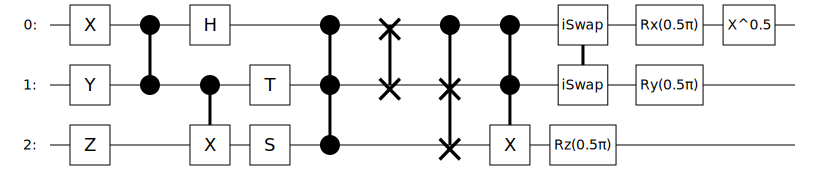

In [ ]:
q0, q1, q2 = cirq.LineQubit.range(3)
ops = [
    cirq.X(q0),
    cirq.Y(q1),
    cirq.Z(q2),
    cirq.CZ(q0,q1),
    cirq.CNOT(q1,q2),
    cirq.H(q0),
    cirq.T(q1),
    cirq.S(q2),
    cirq.CCZ(q0, q1, q2),
    cirq.SWAP(q0, q1),
    cirq.CSWAP(q0, q1, q2),
    cirq.CCX(q0, q1, q2),
    cirq.ISWAP(q0, q1),
    cirq.Rx(0.5 * np.pi)(q0),
    cirq.Ry(.5 * np.pi)(q1),
    cirq.Rz(0.5 * np.pi)(q2),
    (cirq.X**0.5)(q0),
]
cprint(cirq.Circuit(*ops))

For each of these gates, calling `cirq.unitary` on the gate will tell you how it acts on the computational basis.  For example for the Controlled NOT gate,
$ \,
CNOT 
= 
\begin{pmatrix}
1&0&0&0\\
0&1&0&0\\
0&0&0&1\\
0&0&1&0
\end{pmatrix} \,\,$, 
and the Hadamard gate, 
$\,
H 
= 
\tfrac{1}{\sqrt{2}}
\begin{pmatrix}
1&1\\
1&-1
\end{pmatrix}\,$, we get the following:

In [ ]:
print('CNOT =')
print(cirq.unitary(cirq.CNOT))
print('\nH =')
print(cirq.unitary(cirq.H))

CNOT =
[[1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j]]

H =
[[ 0.70710678+0.j  0.70710678+0.j]
 [ 0.70710678+0.j -0.70710678+0.j]]


 There are two ways to apply a gate onto qubits. E.g., we can apply the Hadamard gate `H`  onto a qubit `a` 

1.  using the `on` method:  `cirq.H.on(a)`

2.  calling the gate directly on the qubit (as if the gate was a function and the qubits were arguments): `cirq.H(a)`

##Measurements

*Measurements* are another type of `Operation`. We can measure a qubit in the computational basis via `cirq.measure()`. For example:

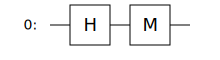

In [ ]:
m = [cirq.H(q0), cirq.measure(q0)]
cprint(cirq.Circuit(*m))

## Creating a Circuit

There are different ways to create a circuit. 
1.   `from_ops` or `(*ops)`: This is the simplest way to make a circuit. This method takes a collection of `Operation`s and outputs a `Circuit`:

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


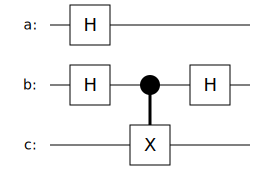

In [ ]:
a = cirq.NamedQubit("a")
b = cirq.NamedQubit("b")
c = cirq.NamedQubit("c")
ops = [cirq.H(a), cirq.H(b), cirq.CNOT(b, c), cirq.H(b)]
circuit = cirq.Circuit(*ops)
cprint(circuit)

In this example code we print the circuit as a text diagram.
A `Circuit` is made up of a sequence of `Moment` objects and each `Moment` is made up of `Operation`s.
To see this internal structure, we can iterate over the `Moment`s in the `Circuit` while printing them out:

In [ ]:
for i, moment in enumerate(circuit):
    print('Moment {}: {}'.format(i, moment))

Moment 0: H(a) and H(b)
Moment 1: CNOT(b, c)
Moment 2: H(b)


We can also just print the circuit's representation `repr` :

In [ ]:
print(repr(circuit))

cirq.Circuit([
    cirq.Moment(operations=[
        cirq.H.on(cirq.NamedQubit('a')),
        cirq.H.on(cirq.NamedQubit('b')),
    ]),
    cirq.Moment(operations=[
        cirq.CNOT.on(cirq.NamedQubit('b'), cirq.NamedQubit('c')),
    ]),
    cirq.Moment(operations=[
        cirq.H.on(cirq.NamedQubit('b')),
    ]),
])



2.  `append`:  Another way to create a circuit is to start with an empty circuit `c = cirq.Circuit()` and simply `c.append(operations)` to add on more and more operations:

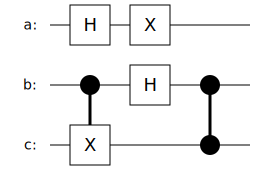

In [ ]:
circuit = cirq.Circuit()
circuit.append([cirq.H(a), cirq.CNOT(b,c), cirq.X(a), cirq.H(b), cirq.CZ(b,c)])
cprint(circuit)

3. `insert`:  Instead of appending, you can insert before a particular moment location (labeled by an integer index):

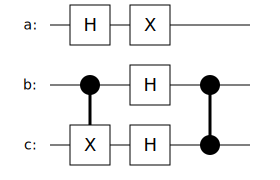

In [ ]:
circuit.insert(1, cirq.H(c))
cprint(circuit)

4.  By using `Circuit`'s constructor, which takes a list of `Moment`s. Each `Moment` must be explicitly constructed with its own list of `Operation`s. This gives complete control over how the operations are layed out:


1st Moment:  CZ(a, b) and X(c)
2nd Moment:  CZ(b, c)
3rd Moment:  H(a) and H(c)


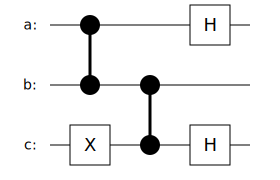

In [ ]:
# Define some Operations
cz01 = cirq.CZ(a, b)
cz12 = cirq.CZ(b, c)
x2 = cirq.X(c)
h0 = cirq.H(a)
h2 = cirq.H(c)
# Define some Moments
moment0 = cirq.Moment([cz01, x2])
moment1 = cirq.Moment([cz12])
moment2 = cirq.Moment([h0, h2])
print('1st Moment: ',moment0)
print('2nd Moment: ',moment1)
print('3rd Moment: ',moment2)
# Define a Circuit by combining all Moments togeteher
circuit = cirq.Circuit((moment0, moment1, moment2))
cprint(circuit)

## Simulating a Circuit

Now that we know how to construct a `Circuit`, let's use Cirq to simulate one. We can create a simulator with `cirq.Simulator()`. In Cirq, simulators make a distinction between a “run” and a “simulation”:

*   The “run” method mimics the actual quantum hardware. 
*   “Simulate” commands are more broad and allow different forms of simulation. For example, it allows us to access the amplitudes of the wave function of the system, even though the wave function is not experimentally accessible. When prototyping small circuits, it is useful to execute “simulate” methods.

### Example 1: Bell state

As an example, let us now create the basic circuit which we encountered in Lecture 2, which entangles two qubits to create a Bell state. After creating the circuit and a simulator, we can "run" a simulation of the circuit and thereby simulate an actual measurement outcome:

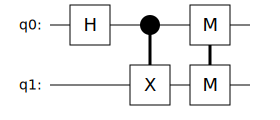


Measurement results:  q0,q1=1, 1


In [ ]:
# Define two qubits and some operations
q0 = cirq.NamedQubit("q0")
q1 = cirq.NamedQubit("q1")
ops = [cirq.H(q0), cirq.CNOT(q0,q1), cirq.measure(q0,q1)]

# Define a basic circuit
circuit = cirq.Circuit(*ops)
cprint(circuit)

# Define a simulator
simulator = cirq.Simulator()

# Run a simulation and print the measurement results:
result = simulator.run(circuit)
print('\nMeasurement results: ',result)

The `run` method mimics the actual hardware -- it doesn't give us access to unphysical objects like the wavefunction. If we want to know what the wave function looks like, we use the `simulate` methods:


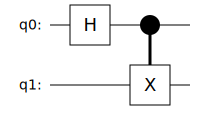


Wavefunction:
[ 0.707+0.j  0.   +0.j -0.   +0.j  0.707+0.j]

Dirac notation:
0.71|00⟩ + 0.71|11⟩


In [ ]:
q0 = cirq.NamedQubit("q0")
q1 = cirq.NamedQubit("q1")
ops = [cirq.H(q0), cirq.CNOT(q0,q1)]

# Define a basic Circuit
circuit = cirq.Circuit(*ops)
cprint(circuit)

# Define a simulator
simulator = cirq.Simulator()

# Simulate the circuit
result = simulator.simulate(circuit)

print('\nWavefunction:')
print(np.around(result.final_state, 3))
print('\nDirac notation:')
print(result.dirac_notation())

### Example 2: 

Here is another simple circuit and a "simulation", as well as a "run", of the circuit:


X**0.5 =
 [[0.5+0.5j 0.5-0.5j]
 [0.5-0.5j 0.5+0.5j]] 



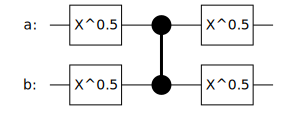


Wavefunction: [0.5+0.j  0. +0.5j 0. +0.5j 0.5+0.j ]
Dirac notation: 0.5|00⟩ + 0.5j|01⟩ + 0.5j|10⟩ + 0.5|11⟩ 



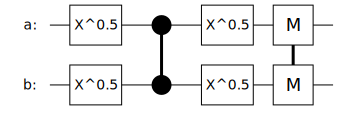


Measurement results:  a,b=0, 1


In [ ]:
sqrt_x = cirq.X**0.5
print('X**0.5 =\n',cirq.unitary(sqrt_x),'\n')
ops = [sqrt_x(a), sqrt_x(b), cirq.CZ(a,b), sqrt_x(a), sqrt_x(b)]    

# Define a circuit from the Operations ops
circuit = cirq.Circuit(*ops)
cprint(circuit)

# Define a simulator 
simulator = cirq.Simulator()

# Simulate the circuit
result = simulator.simulate(circuit, qubit_order=[a, b])

print('\nWavefunction:',np.around(result.final_state, 3))
print('Dirac notation:',result.dirac_notation(),'\n')

# Run a simulation and print the measurement results
circuit.append(cirq.measure(a,b))
cprint(circuit)
result = simulator.run(circuit)
print('\nMeasurement results: ',result)

Running this multiple times should result in different measurement results, since the above circuit produces a superposition over all computational basis states.   

Notice that we passed a `qubit_order` into the `simulate` method. This order helps define the qubit order used in the resulting `final_state` vector.  The `qubit_order` argument is optional. The simplest `qubit_order` value you can provide is a list of the qubits in the desired order. When it is omitted, qubits are sorted ascending according to the ordering methods defined by their python class (for example `cirq.NamedQubit` sorts lexicographically by name).

The mapping from the order of the qubits to the order of the  amplitudes in the wave function goes as follows: If wave function is array 
`(0.1, 0.2, 0.3, 0.4)`
then this is 
`0.1|00⟩ + 0.2|01⟩ + 0.3|10⟩ + 0.4|11⟩ `
in Dirac notation.  If the qubit order is `qubit_order=[a,b]`, then `|00>` means qubit a is in state |0> and qubit b is in state |0>, `|01>` means qubit a is in state |0> and qubit b is in state |1>, etc.

### Repetitions

In Example 1, the circuit creates a Bell state 
$ \,\frac{1}{\sqrt{2}} \big( |00\rangle + |11\rangle \big)\,.$
The Born rule tells us that we should obtain the measurement results 0,0 and 1,1 with equal probability: $$p(0,0) = p(1,1)=\bigg|\frac{1}{\sqrt{2}}\bigg|^{\,2} = \frac{1}{2} $$
We can run a simulation of the circuit multiple times and obtain a statistic for the measurement results.

The simulator `run` methods take an option for repeating the circuit. If 
the measurements in the circuit are terminal, and all other operations are unitary, this simulator is optimized to not recompute the wavefunction before sampling from the circuit.  

So for example this code doesn't recompute the wave function but knows to sample from the final probability distribution:

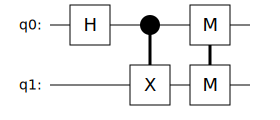

Counter({3: 515, 0: 485})


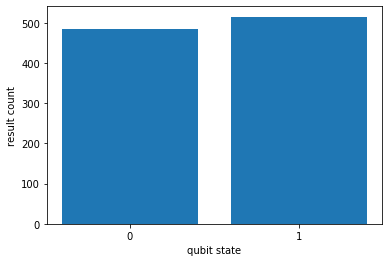

array([485., 515.])

In [ ]:
ops = [cirq.H(q0), cirq.CNOT(q0,q1), cirq.measure(q0,q1)]    
circuit = cirq.Circuit(*ops)
cprint(circuit)
result = simulator.run(circuit, repetitions=1000)
print(result.histogram(key='q0,q1'))
# We can also plot the results as a histogram:
cirq.plot_state_histogram(result)

The `histogram` method applied on the `result` sums over all the different results for all of the different repetitions. In the Counter, the states |00>, |01>, |10>, |11> are indexed by 0, 1, 2, 3 respectively.


##Bloch sphere representation of single qubit states and operations



We can visualize the state of a single qubit on the Bloch sphere using `cirq.bloch_vector_from_state_vector()`, which gives us the Bloch vector in Cartesian coordinates $\left[x, y, z\right]$. 

As an example, let us create a circuit from three qubits $a$, $b$ and $c$, and prepare qubit $a$ in the state $|0\rangle$, qubit $b$ in the state $\tfrac{1}{\sqrt{2}}(|0\rangle + |1\rangle)$ and qubit $c$ in the state $|1\rangle$. Printing the Bloch sphere representation of the final states of the three qubits, we can see where these three states lie on the Bloch sphere respectively:

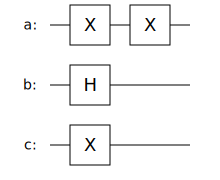


Bloch vector qubit a:  x = 0.0   y = 0.0   z = 1.0
Bloch vector qubit b:  x = 1.0   y = 0.0   z = 0.0
Bloch vector qubit c:  x = 0.0   y = 0.0   z = -1.0


In [ ]:
a = cirq.NamedQubit("a")
b = cirq.NamedQubit("b")
c = cirq.NamedQubit("c")
# Put a into |0>, b into |+> and c into |1>:
circuit = cirq.Circuit([cirq.X(a),cirq.X(a),cirq.H(b),cirq.X(c)])
cprint(circuit)
simulator = cirq.Simulator()
result=simulator.simulate(circuit)
x0,y0,z0 = np.around(cirq.bloch_vector_from_state_vector(result.final_state,0),3)
x1,y1,z1 = np.around(cirq.bloch_vector_from_state_vector(result.final_state,1),3)
x2,y2,z2 = np.around(cirq.bloch_vector_from_state_vector(result.final_state,2),3)
print('\nBloch vector qubit a: ','x =',x0,'  y =',y0,'  z =',z0)
print('Bloch vector qubit b: ','x =',x1,'  y =',y1,'  z =',z1)
print('Bloch vector qubit c: ','x =',x2,'  y =',y2,'  z =',z2)

### Single qubit gates visualized on Bloch sphere

The Bloch sphere can also help us visualize the action of single qubit gates on a single qubit state (namely as rotations of the Bloch vector). Let us visualize the action of the Pauli gates $X, Y, Z$ and the Hadamard gate $H$ on a single qubit state. First, we create some non-trivial qubit state by applying a couple of rotation gates:

In [ ]:
circuit = cirq.Circuit(cirq.Rx(0.2 * np.pi)(a), cirq.Rz(0.2 * np.pi)(a))
simulator = cirq.Simulator()
result0=simulator.simulate(circuit)
print('\nQubit state:',result0.dirac_notation())
Bloch_vector0 = np.around(cirq.bloch_vector_from_state_vector(result0.final_state,0),3)
print('Bloch vector: ',Bloch_vector0)


Qubit state: (0.9-0.29j)|0⟩ + (0.1-0.29j)|1⟩
Bloch vector:  [ 0.345 -0.476  0.809]


Now apply a Pauli X gate (180 deg rotation around x axis):

In [ ]:
circuit.append(cirq.X(a))
result1=simulator.simulate(circuit)
print('\nQubit state after X gate:',result1.dirac_notation())
Bloch_vector1 = np.around(cirq.bloch_vector_from_state_vector(result1.final_state,0),3)
print('Bloch vector: ',Bloch_vector1)


Qubit state after X gate: (0.1-0.29j)|0⟩ + (0.9-0.29j)|1⟩
Bloch vector:  [ 0.345  0.476 -0.809]


Now apply a Pauli Y gate (180 deg rotation around y axis):

In [ ]:
circuit.append(cirq.Y(a))
result2=simulator.simulate(circuit)
print('\nQubit state after Y gate:',result2.dirac_notation())
Bloch_vector2 = np.around(cirq.bloch_vector_from_state_vector(result2.final_state,0),3)
print('Bloch vector: ',Bloch_vector2)


Qubit state after Y gate: (-0.29-0.9j)|0⟩ + (0.29+0.1j)|1⟩
Bloch vector:  [-0.345  0.476  0.809]


Now apply a Pauli Z gate (180 deg rotation around z axis):

In [ ]:
circuit.append(cirq.Z(a))
result3=simulator.simulate(circuit)
print('\nQubit state after Z gate:',result3.dirac_notation())
Bloch_vector3 = np.around(cirq.bloch_vector_from_state_vector(result3.final_state,0),3)
print('Bloch vector: ',Bloch_vector3)


Qubit state after Z gate: (-0.29-0.9j)|0⟩ + (-0.29-0.1j)|1⟩
Bloch vector:  [ 0.345 -0.476  0.809]


Now apply a H gate (180 deg rotation around (x+z) axis):

In [ ]:
circuit.append(cirq.H(a))
result4=simulator.simulate(circuit)
print('\nQubit state after H gate:',result4.dirac_notation())
Bloch_vector4 = np.around(cirq.bloch_vector_from_state_vector(result4.final_state,0),3)
print('Bloch vector: ',Bloch_vector4)


Qubit state after H gate: (-0.42-0.71j)|0⟩ - 0.57j|1⟩
Bloch vector:  [0.809 0.476 0.345]


##Insertion strategies

We effectively take a 1-dimensional sequence of operations and output a 2-dimensional circuit.
There is a degree of freedom that hasn't been account for: how Cirq chooses the moment that each operation will be placed within depends on the  `InsertStrategy` you choose.

There are currently four insertion strategies in Cirq:

1.  `InsertStrategy.EARLIEST` (default strategy)
2. `InsertStrategy.NEW`
3. `InsertStrategy.INLINE`
4.  `InsertStrategy.NEW_THEN_INLINE` 

An `InsertStrategy` defines how ``Operations`` are placed in a `Circuit` when requested to be inserted at a given location.
Here a `location` is identified by the index of the `Moment` in the `Circuit` that operations should be placed before.

`InsertStrategy.EARLIEST` is the default strategy: When we request to add an operation affecting certain qubits, this strategy scans backward from the insert location, until a moment is found which already has operations touching these qubits. The new operation is then added into the moment just after that location.
For example, if we first create an `Operation` in a single moment,
and then use `InsertStrategy.EARLIEST`, the `Operation` can slide back to this first `Moment` if there is space:

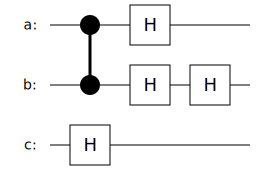

In [ ]:
from cirq.circuits import InsertStrategy
circuit = cirq.Circuit()
circuit.append([cirq.CZ(a, b)])
circuit.append([cirq.H(c), cirq.H(b), cirq.H(b), cirq.H(a)], strategy=InsertStrategy.EARLIEST)
cprint(circuit)

`InsertStrategy.NEW` creates a new moment for every operation that is inserted:

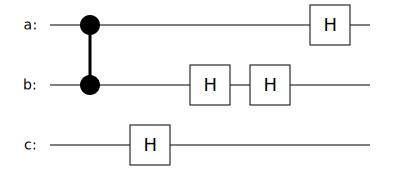

In [ ]:
circuit = cirq.Circuit()
circuit.append([cirq.CZ(a, b)])
circuit.append([cirq.H(c), cirq.H(b), cirq.H(b), cirq.H(a)], strategy=InsertStrategy.NEW)
cprint(circuit)

`InsertStrategy.INLINE` attempts to add the operation to insert into the moment just before the desired insert location. But, if there’s already an existing operation affecting any of the qubits touched by the operation to insert, a new moment is created instead:

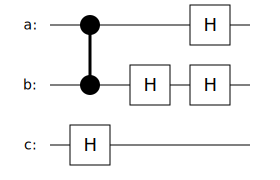

In [ ]:
circuit = cirq.Circuit()
circuit.append([cirq.CZ(a, b)])
circuit.append([cirq.H(c), cirq.H(b), cirq.H(b), cirq.H(a)], strategy=InsertStrategy.INLINE)
cprint(circuit)

`InsertStrategy.NEW_THEN_INLINE` creates a new moment at the desired insert location for the first operation, but then switches to inserting operations according to `InsertStrategy.INLINE` :

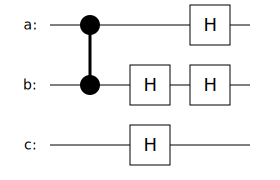

In [ ]:
circuit = cirq.Circuit()
circuit.append([cirq.CZ(a, b)])
circuit.append([cirq.H(c), cirq.H(b), cirq.H(b), cirq.H(a)], strategy=InsertStrategy.NEW_THEN_INLINE)
cprint(circuit)

### Exercise: Create a circuit with `.append()`

Create the following circuit, creating exactly the moments indicated by the spacing of the circuit diagram and using the least number of appends:

(Hint: the best you can do is using two appends)

```
a: ───@───H───────────H───H───
      │
b: ───@───────H───@───H───────
                  │
c: ───H───────────@───────────
```



### Solution

In [ ]:
#@title 
a = cirq.NamedQubit('a')
b = cirq.NamedQubit('b')
c = cirq.NamedQubit('c')
circuit = cirq.Circuit()
circuit.append([cirq.CZ(a, b), cirq.H(c), cirq.H(a)] )
circuit.append([cirq.H(b), cirq.CZ(b, c), cirq.H(b), cirq.H(a), cirq.H(a)],
               strategy=cirq.InsertStrategy.NEW_THEN_INLINE)
print(circuit)

a: ───@───H───────────H───H───
      │
b: ───@───────H───@───H───────
                  │
c: ───H───────────@───────────


##Moment by Moment simulations

Very useful in practice are the following single qubit rotation gates:

$$ 
{\tt cirq.Rx(θ)}: \exp(-i \theta X) = cos \theta I - i \sin \theta X 
=
\begin{pmatrix}
 ~\cos \theta & -i \sin \theta \\ -i \sin \theta & \cos \theta
 \end{pmatrix} 
 \\
$$ 
$$ 
{\tt cirq.Ry(θ)}: \exp(-i \theta Y) = cos \theta I - i \sin \theta Y 
=
\begin{pmatrix}
 ~\cos \theta &  -\sin \theta \\  \sin \theta & \cos \theta
 \end{pmatrix}
 \\
$$ 
$$ 
{\tt cirq.Rz(θ)}: \exp(-i \theta Z) = cos \theta I - i \sin \theta Z 
=
\begin{pmatrix} 
~e^{i \theta} & 0 \\ 0 & e^{-i \theta} 
\end{pmatrix}
 \\
$$ 


If we apply `cirq.Rx` to a state we can see how it rotates the state by a specified angle.  To do this let us introduce a new simulate method `simulate_moment_steps`.  This allows us to simulate the circuit `Moment` by `Moment`.  At each point we can access the state.  For example here we can use this to create a circuit that is a series of small `cirq.Rx` rotations and plot the probablility of measureing the state in the $|0\rangle$ state:

Circuit consists of 200 small rotations about Pauli X axis:

a: ───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)

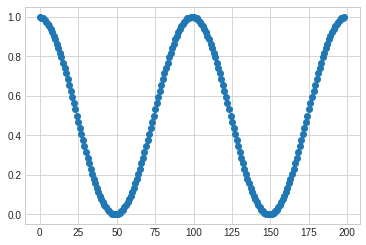

In [ ]:
a = cirq.NamedQubit('a')
circuit = cirq.Circuit(*[cirq.Rx(np.pi / 50.0)(a) for theta in range(199)])
print('Circuit consists of 200 small rotations about Pauli X axis:\n')
print(circuit)
p0 = []
z = []
print('\nWe step through the circuit and plot the z component of the vector '
      'as a function of the index of the moment being stepped over:\n')
for i, step in enumerate(simulator.simulate_moment_steps(circuit)):
    prob = np.abs(step.state_vector()) ** 2
    z.append(i)
    p0.append(prob[0])
matplotlib.pyplot.style.use('seaborn-whitegrid')
matplotlib.pyplot.plot(z, p0, 'o')

Above we have given ourselves direct access to the wave function and calculated the exact probabilities.  Suppose we wanted to sample from the wave function at each point instead.  

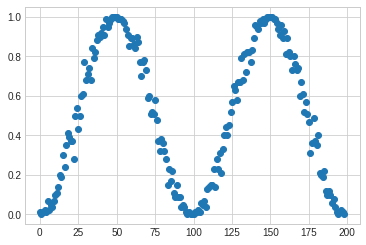

In [ ]:
repetitions = 100
a = cirq.NamedQubit('a')
circuit = cirq.Circuit(*[cirq.Rx(np.pi / 50.0)(a) for theta in range(199)])
p0 = []
z = []
for i, step in enumerate(simulator.simulate_moment_steps(circuit)):
    samples = step.sample([a], repetitions=repetitions)
    prob0 = np.sum(samples, axis=0)[0] / repetitions
    p0.append(prob0)
    z.append(i)
matplotlib.pyplot.style.use('seaborn-whitegrid')
matplotlib.pyplot.plot(z, p0, 'o')

##Google's Xmon Gates


Cirq was built because Google has a class of superconducting qubit devices on which they want to explore algorithms on Noisy Intermediate-Scale Quantum (NISQ) technology.
At the hardware level, the basic gate set that the xmon architecture supports is rotations about the Pauli $Z$ axis,
$$\exp(-iZt) = 
\begin{pmatrix}
e^{it} & 0 \\
0 & e^{-it}
\end{pmatrix}$$
rotations about any axis in the Pauli $X$ and $Y$ plane,
$$\exp(-i(\cos \theta X + \sin \theta Y) t) = 
\begin{pmatrix}
\cos t & -i\sin t e^{-i \theta} \\
-i\sin t e^{i \theta} & \cos t
\end{pmatrix}
$$
and a two-qubit phase gate about the $|11\rangle$ state:
$$
\exp(-it |11\rangle \langle 11|) =
\begin{pmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & \exp(-it)
\end{pmatrix}
$$
And finally a measurement in the computational basis.

To check whether the gate one is using is in the xmon gate set, one can use `is_native_xmon_op`.

In [ ]:
cirq.google.is_native_xmon_op(cirq.X(cirq.NamedQubit('a')))

True

In [ ]:
cirq.google.is_native_xmon_op(cirq.CNOT(cirq.NamedQubit('a'), cirq.NamedQubit('b')))

False

When a gate is not a native xmon gate, Cirq can often convert it to an xmon native gate:

In [ ]:
converter = cirq.google.ConvertToXmonGates()
converted = converter.convert(cirq.CNOT(cirq.NamedQubit('a'), cirq.NamedQubit('b')))
print(cirq.Circuit(*converted))

a: ───Z^0.75────X^0.5────S^-1───Y^-0.5───@───S^-1───Y^0.5───Y^0.5─────Z^-0.75───
                                         │
b: ───X^-0.25───Y^-0.5───────────────────@───S^-1───Y^0.5───X^-0.25─────────────


##Custom Gate Implementation

Let's see how to define a custom gate.  

As an example, we will define a single qubit gate that has only rational amplitudes:
$$
\zeta =\left[ \begin{array}
~\frac{3}{5} & \frac{4}{5} \\
-\frac{4}{5} & \frac{3}{5}
\end{array} \right]
$$

To implement this gate, we define a class that inherits from `cirq.SingleQubitGate` and implements the `cirq.SupportsUnitary` protocol by implementing the `_unitary_(self)` magic method.  Implementing also the `__str__` magic method, we define a string representation, which Cirq will use when priting out the gate in a circuit diagram:


findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


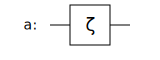


ζ =  [[ 0.6  0.8]
 [-0.8  0.6]]


In [ ]:
class RationalGate(cirq.SingleQubitGate):
    
    def _unitary_(self):
        return np.array([[3 / 5, 4 / 5], [-4 / 5, 3 / 5]])
    
    def __str__(self):
        return 'ζ'

a = cirq.NamedQubit('a')
rg = RationalGate()
cprint(cirq.Circuit(*[rg(a)]))
print('\nζ = ',cirq.unitary(rg))

Most of the time, we will work with qubits. However, in principle we could also work with qudits and Cirq supports simulating circuits involving qudits. 

In order to apply a gate to some qudits, the dimensions of the gate must match the dimensions of the qudits. 

For example, if we want a gate to represent a unitary evolution on a qubit, a qutrit, and another qutrit, the gate's "qid shape" is (2,3,3) and its `on` method will accept only 3 Qids with dimensions 2, 3 and 3 respectively. We can specify the dimension of each qudit to act on by implementing the `_qid_shape_` magic method. 

Let's here define a qutrit gate, i.e. a gate represented as a $3\times 3$ matrix, which we can apply to a qutrit:



H3 = 
 [[ 0.5         0.70710678  0.5       ]
 [ 0.5        -0.70710678  0.5       ]
 [ 0.70710678  0.         -0.70710678]] 



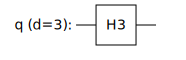


Final state in Dirac notation: 0.5|0⟩ + 0.5|1⟩ + 0.71|2⟩
q (d=3)=1


In [ ]:
class QutritGate(cirq.SingleQubitGate):
  
  def _qid_shape_(self):
      return (3,)

  def _unitary_(self):
      return np.array([[1/2, 2**0.5/2, 1/2], [1/2, -2**0.5/2, 1/2], [2**0.5/2, 0, -2**0.5/2]])

  #def _circuit_diagram_info_(self, args):
      #return 'Q3'
  def __str__(self):
        return 'H3'

H3 = QutritGate()
print('H3 = \n',cirq.unitary(QutritGate()),'\n')
q = cirq.NamedQubit('q').with_dimension(3)

circuit = cirq.Circuit(H3(q))
cprint(circuit)

# Define a simulator
simulator = cirq.Simulator()

# Simulate the circuit
result = simulator.simulate(circuit)

print('\nFinal state in Dirac notation:', result.dirac_notation())

circuit.append(cirq.measure(q))
result = simulator.run(circuit)
print(result)